<a href="https://colab.research.google.com/github/BrianKipngeno/Graduate-admission-prediction-using-PyTorch/blob/main/Grad_school_admission_prediction_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Let's use the dataset below to to predict a student's chance of getting into grad school based on some tests.

Dataset link: http://bit.ly/uni_admission



In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Let's load our dataset
df3 = pd.read_csv('http://bit.ly/uni_admission')

df3.head()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Dropping the unecessary column
df3.drop(["Serial No."],axis=1, inplace=True)

In [7]:
# Let's divides the dataset into features and labels sets
X = df3.drop(["admit_chance"], axis = 1).values

y = df3.filter(["admit_chance"], axis = 1).values

In [10]:
# Let's split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# We then convert the dataset features and labels to torch tensors.
X_train = torch.tensor(X_train).float()

X_test = torch.tensor(X_test).float()

y_train = torch.tensor(y_train).float()

y_test = torch.tensor(y_test).float()

In [14]:
# Let's build our model
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x

model = Net()

In [15]:
# Training the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000

loss_vals = []

for epoch in range(num_epochs):

   # Clear out the gradients from the last step loss.backward()
    optimizer.zero_grad()

   # Step 3: Forward prpagation
    outputs = model(X_train)

   # Step 4: Loss computation
    loss = criterion(outputs, y_train)

   # Step 5: Backward propagation to calculate gradients
    loss.backward()

    loss_vals.append(loss.detach().numpy().item())

   # Updating the weights
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0148
Epoch [200/1000], Loss: 0.0121
Epoch [300/1000], Loss: 0.0095
Epoch [400/1000], Loss: 0.0080
Epoch [500/1000], Loss: 0.0095
Epoch [600/1000], Loss: 0.0066
Epoch [700/1000], Loss: 0.0079
Epoch [800/1000], Loss: 0.0063
Epoch [900/1000], Loss: 0.0060
Epoch [1000/1000], Loss: 0.0064


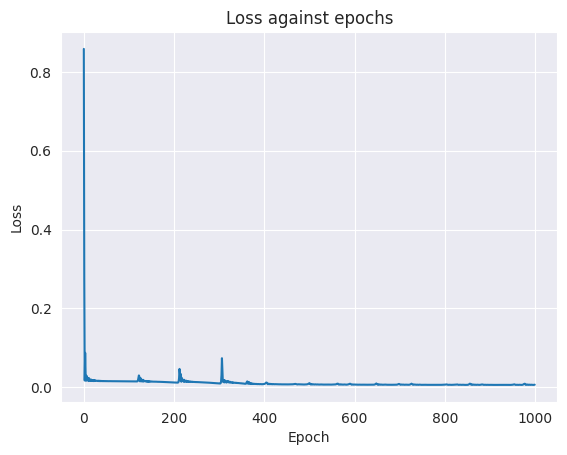

In [16]:
# Let's plot our loss
import seaborn as sns

sns.set_style('darkgrid')

indexes = list(range(len(loss_vals)))

sns.lineplot(x = indexes, y = loss_vals)

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('Loss against epochs')

plt.show()

In [17]:
# Let's make our prediction
model.requires_grad_(False)

outputs = model(X_test)

mae = mean_absolute_error(y_test, outputs)

mse = mean_squared_error(y_test, outputs)

print(f'Mean absolute error: {mae:.2f}')

print(f'Mean squared error: {mse:.2f}')

Mean absolute error: 0.07
Mean squared error: 0.01


In [18]:
# Let's compare these values
predictions = [item for sublist in outputs.tolist() for item in sublist]

y_test = [item for sublist in y_test.tolist() for item in sublist]

results = pd.DataFrame({'Actual Chance': y_test, 'Predicted Chance': predictions})

results.head(10)

,Actual Chance,Predicted Chance
0,0.64,0.681274
1,0.85,0.788256
2,0.80,0.697624
3,0.91,0.896991
4,0.68,0.632068
5,0.54,0.619561
6,0.54,0.536840
7,0.65,0.740561
8,0.52,0.509701
9,0.79,0.632069
